<a href="https://colab.research.google.com/github/DiKachura/machine_learning/blob/main/%D0%B2%D0%B0%D1%85_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

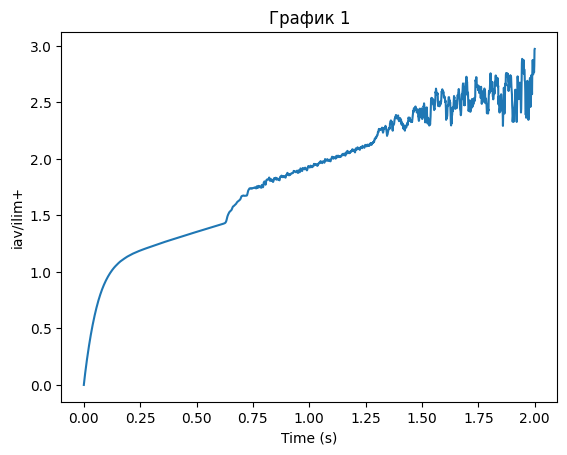

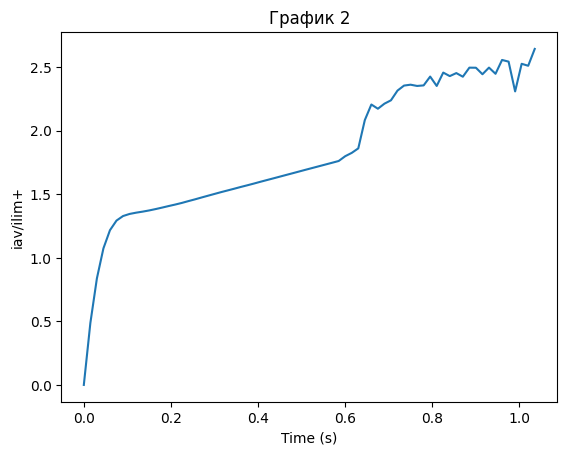

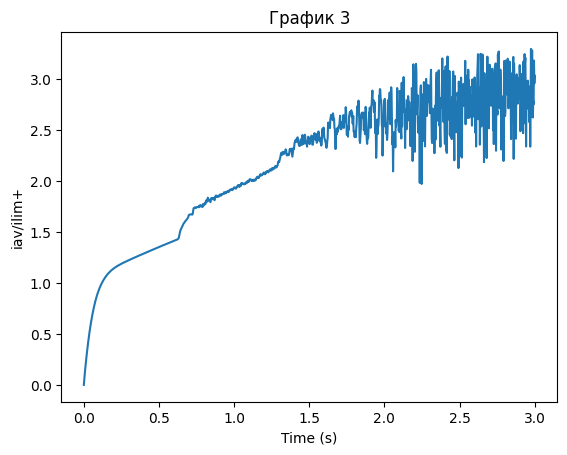

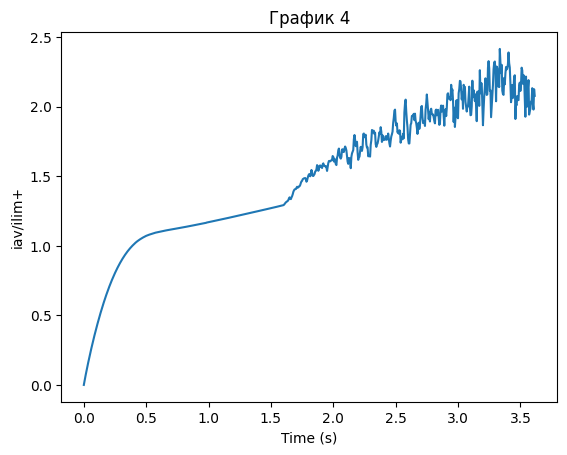

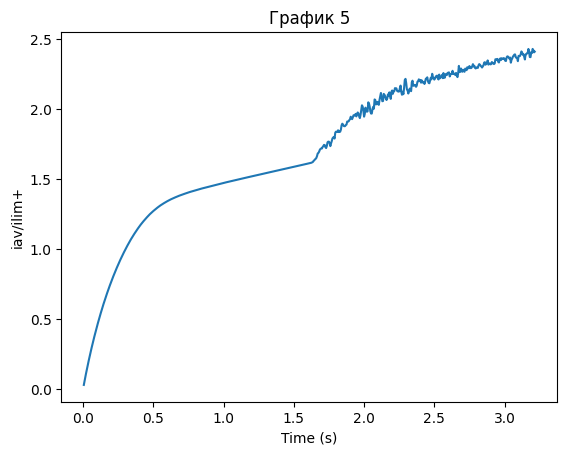

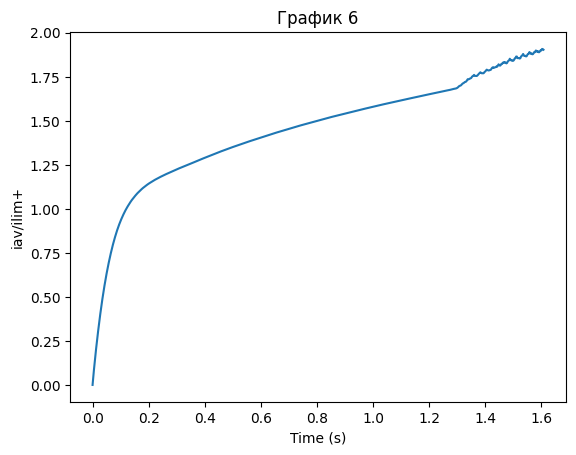

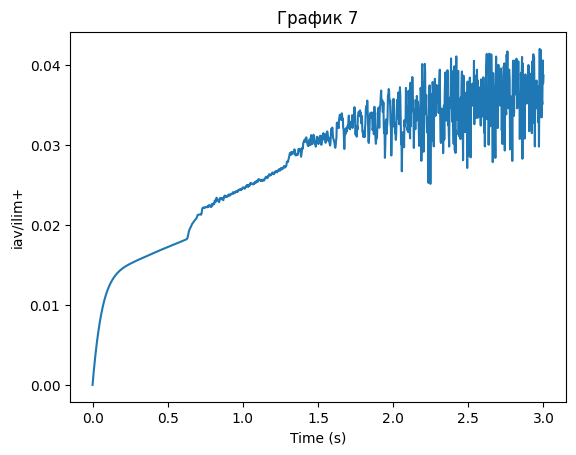

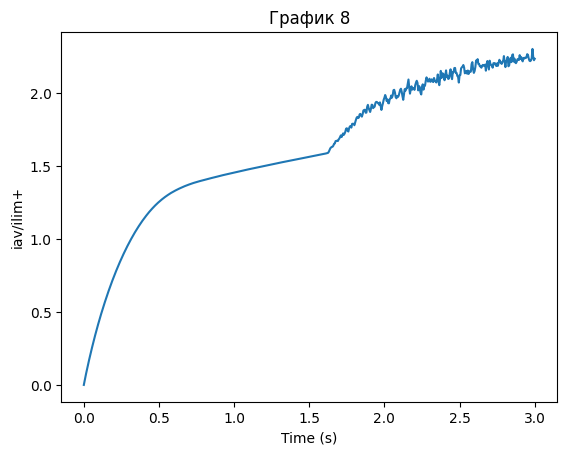

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Activation, Input, MaxPooling1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, Conv1D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.utils import plot_model
from IPython.display import display, Image


data = pd.read_csv('/content/диплом (1).csv')

# Группировка данных по номерам графиков
grouped_data = data.groupby('version')


for group_name, group_data in grouped_data:
    x = group_data['Time (s)']*0.005
    y = group_data['iav/ilim+']


    plt.figure()


    plt.plot(x, y)


    plt.title('График {}'.format(group_name))
    plt.xlabel('Time (s)')
    plt.ylabel('iav/ilim+')


    plt.show()

In [16]:
import pandas as pd

data = pd.read_csv("/content/диплом (1).csv")

data.head()

,Time (s),iav/ilim+,version,H,L,V0,C0,D1,D2,z1,...,j3a,j4k,D1_1,spacers_col,spacers_position,spacers_rad,sapcers_square,x,y,spacers_type
0,0.0,0.000000,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
1,0.2,0.018764,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
2,0.4,0.036717,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
3,0.6,0.054130,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
4,0.8,0.071109,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no


In [17]:
import pandas as pd

data = pd.read_csv("/content/диплом (1).csv")


selected_row = data['iav/ilim+']

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()

print(sliced_data.head())

19    0.155028
20    0.170450
21    0.185590
22    0.200478
23    0.215136
Name: iav/ilim+, dtype: float64


In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = pd.read_csv("/content/диплом (1).csv")

# Выбор одного ряда данных
selected_row = data['iav/ilim+']

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()


data_array = np.array(sliced_data)
data_x_list = []
data_y_list = []

for i in range(len(data_array) - window_size - 5):
    vekt_x = np.reshape(data_array[i:i+window_size], (window_size, 1))
    data_x_list.append(vekt_x)
    data_y_list.append(data_array[i+window_size:i+window_size+5])

data_x_array = np.stack(data_x_list)
data_y_array = np.stack(data_y_list)

# Создание модели
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, padding="same", strides=1, input_shape=(window_size, 1)))
model.add(Conv1D(8, 5))
model.add(Dropout(0.3))
model.add(Conv1D(16, 5))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation=None))

# Компиляция модели
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer, loss='mae')

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data_x_array) * 0.8)  # 80% данных для обучения
train_data_x = data_x_array[:train_size]
train_data_y = data_y_array[:train_size]
test_data_x = data_x_array[train_size:]
test_data_y = data_y_array[train_size:]


EPOCHS = 1000
model.fit(train_data_x, train_data_y, epochs=EPOCHS, batch_size=2)

# Оценка точности модели на тестовой выборке
test_loss = model.evaluate(test_data_x, test_data_y)
print("MAE на тестовой выборке:", test_loss)

Epoch 1/1000
2817/2817 [==============================] - 11s 3ms/step - loss: 0.3690
Epoch 2/1000
2817/2817 [==============================] - 9s 3ms/step - loss: 0.1747
Epoch 3/1000
2817/2817 [==============================] - 9s 3ms/step - loss: 0.1467
Epoch 4/1000
2817/2817 [==============================] - 9s 3ms/step - loss: 0.1310
Epoch 5/1000
2817/2817 [==============================] - 8s 3ms/step - loss: 0.1228
Epoch 6/1000
2817/2817 [==============================] - 7s 2ms/step - loss: 0.1162
Epoch 7/1000
2817/2817 [==============================] - 8s 3ms/step - loss: 0.1108
Epoch 8/1000
2817/2817 [==============================] - 8s 3ms/step - loss: 0.1024
Epoch 9/1000
2817/2817 [==============================] - 7s 2ms/step - loss: 0.1002
Epoch 10/1000
2817/2817 [==============================] - 9s 3ms/step - loss: 0.0956
Epoch 11/1000
2817/2817 [==============================] - 8s 3ms/step - loss: 0.0933
Epoch 12/1000
2817/2817 [==============================] - 7s 

In [20]:
# Сохранение весов модели
model.save_weights('/content/model_weights1.h5')

# Сохранение архитектуры модели
with open('/content/model_architecture1.json', 'w') as f:
    f.write(model.to_json())

1/1 [==============================] - 0s 21ms/step


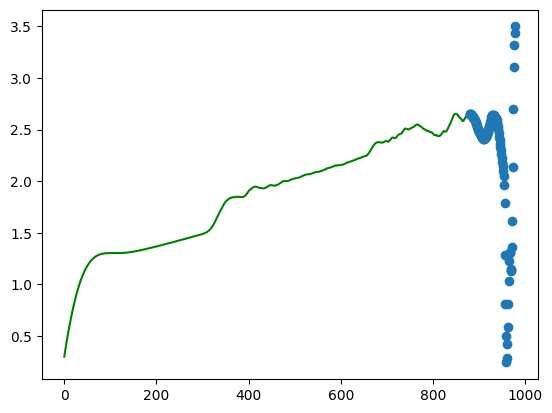

Предсказанные точки: [2.6463168, 2.650457, 2.653172, 2.6514888, 2.6452312, 2.6377556, 2.6309059, 2.6237462, 2.616645, 2.6090913, 2.5990834, 2.5885422, 2.580179, 2.5702133, 2.5602584, 2.5513399, 2.539341, 2.524343, 2.5083983, 2.4940948, 2.481977, 2.4723268, 2.463544, 2.4550908, 2.4470193, 2.438925, 2.432081, 2.4266982, 2.4213262, 2.4164872, 2.41299, 2.410987, 2.4113417, 2.4153655, 2.4227376, 2.431969, 2.441995, 2.4520683, 2.4625711, 2.4740756, 2.4869757, 2.5017447, 2.5182743, 2.5361924, 2.5557365, 2.5771327, 2.5998263, 2.619226, 2.632956, 2.6407008, 2.6429756, 2.6413856, 2.6376214, 2.6331646, 2.6286864, 2.6242867, 2.6196978, 2.6140912, 2.6036062, 2.5880096, 2.5663843, 2.5387352, 2.5055933, 2.469128, 2.432113, 2.396306, 2.36238, 2.3298037, 2.2973099, 2.263242, 2.226142, 2.1857462, 2.1422224, 2.096486, 2.045244, 1.9646482, 1.7835402, 1.2884994, 0.8057677, 0.49510318, 0.2419191, 0.28380686, 0.42557615, 0.5863192, 0.81303567, 1.0272517, 1.221447, 1.3133451, 1.2988224, 1.1356449, 1.1289966, 

In [24]:
data = pd.read_excel("/content/полная_тестовая_выборка.xlsx")

# Выбор одного ряда данных
selected_row = data['iav/ilim+']

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()


data_array = np.array(sliced_data)

# Предсказание значений
val_data = np.array(data_array[-window_size:])
predicted_data = []

for _ in range(100):
    val_data_reshaped = np.reshape(val_data, (1, window_size, 1))
    pred = model.predict(val_data_reshaped)
    predicted_data.append(pred[0][-1])
    val_data = np.concatenate((val_data[1:], np.expand_dims(pred[0][-1], axis=0)))


plt.plot(data_array, 'g', np.arange(len(data_array), len(data_array) + len(predicted_data)), predicted_data, 'o')
plt.show()

print("Предсказанные точки:", predicted_data)